In [2]:
import h5py
from pathlib import Path
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def print_attrs(obj, indent=0):
    """Print all attributes for a given HDF5 object."""
    for key, value in obj.attrs.items():
        print("  " * indent + f"Attribute: {key} -> {value}")

def print_h5_structure(obj, name="", indent=0):
    """Recursively print the structure of the HDF5 file including groups and datasets along with their attributes."""
    print("  " * indent + f"{name} (Type: {type(obj).__name__})")
    print_attrs(obj, indent+1)
    if isinstance(obj, h5py.Group):
        for key, item in obj.items():
            print_h5_structure(item, name=key, indent=indent+1)

base_dir = Path("/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/Penn")
exclude_subjects = {"sub-RID0051", "sub-RID0595"}

# Get subject folders (sorted) and select only the first three
subject_folders = sorted([d for d in base_dir.iterdir() if d.is_dir() and d.name not in exclude_subjects])
subjects_to_loop = subject_folders[:3]

for folder in subjects_to_loop:
    h5_files = list(folder.rglob("interictal_ieeg_processed.h5"))
    if not h5_files:
        print(f"No H5 file found in {folder}")
        continue
    h5_file = h5_files[0]
    print(f"\nSubject: {folder.name}")
    print(f"H5 file: {h5_file}")
    with h5py.File(h5_file, "r") as f:
        print("\nFile-level attributes:")
        for key, value in f.attrs.items():
            print(f"  {key}: {value}")
        
        print("\nHDF5 file structure:")
        print_h5_structure(f, name="/", indent=0)


Subject: sub-RID0031
H5 file: /Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/Penn/sub-RID0031/interictal_ieeg_processed.h5

File-level attributes:

HDF5 file structure:
/ (Type: File)
  bipolar_montage (Type: Group)
    coordinates (Type: Dataset)
      Attribute: labels -> ['LA01' 'LA02' 'LA03' 'LA04' 'LA05' 'LA06' 'LA07' 'LA08' 'LA09' 'LB01'
 'LB02' 'LB03' 'LB04' 'LB05' 'LB06' 'LB07' 'LB08' 'LB09' 'LC01' 'LC02'
 'LC03' 'LC04' 'LC05' 'LC06' 'LC07' 'LC08' 'LC09' 'LD01' 'LD02' 'LD04'
 'LD05' 'LD06' 'LD07' 'LE01' 'LE02' 'LE03' 'LE04' 'LE05' 'LE06' 'LE07'
 'LE08' 'RA01' 'RA02' 'RA03' 'RA04' 'RA05' 'RA06' 'RA07' 'RA08' 'RA09'
 'RB01' 'RB02' 'RB03' 'RB04' 'RB05' 'RB06' 'RB07' 'RB08' 'RB09' 'RC01'
 'RC02' 'RC03' 'RC04' 'RC05' 'RD01' 'RD02' 'RD03' 'RD04' 'RD05' 'RD06'
 'RD07' 'RE01' 'RE02' 'RE03' 'RE04' 'RF01' 'RF02' 'RF03' 'RF04' 'RF05'
 'RF06' 'RG01' 'RG02' 'RG03' 'RG04' 'RH01' 'RH02' 'RH03' 'RH04' 'RH05'
 'RH06' 'RH07' 'RH08' 'RH09' 'RI01' 'RI02' 'RI03' 'RI04' 'RI05


Basic statistics across all subjects:

FC Matrix: pearson
  RR: {'count': 3108, 'mean': 0.009453657694191065, 'std': 0.23809703587104805, 'median': 0.005000042246740168, 'min': -0.9411307434021783, 'max': 0.9350024001210603, 'outlier_percentage': 7.722007722007722}
  SS: {'count': 113348, 'mean': 0.004112234438639187, 'std': 0.11498571304016782, 'median': 0.0018618212141023266, 'min': -0.992428185260514, 'max': 0.9450841191215427, 'outlier_percentage': 13.862617778875673}
  RS: {'count': 30469, 'mean': 0.0016978058736482641, 'std': 0.09836802107413566, 'median': 0.0013664363463551513, 'min': -0.862968434867689, 'max': 0.8372314450389658, 'outlier_percentage': 14.030654107453477}

FC Matrix: squared_pearson
  RR: {'count': 3108, 'mean': 0.056779570134378066, 'std': 0.10676902568828059, 'median': 0.013377804230309228, 'min': 1.2961870049960648e-10, 'max': 0.8857270761767367, 'outlier_percentage': 11.808236808236808}
  SS: {'count': 113348, 'mean': 0.013238624675434152, 'std': 0.05157532

/var/folders/g6/qyrrm6017k55qbd8_wywqxgw0000gn/T/ipykernel_20722/2563254864.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(data_to_plot, labels=labels)
/var/folders/g6/qyrrm6017k55qbd8_wywqxgw0000gn/T/ipykernel_20722/2563254864.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(data_to_plot, labels=labels)
/var/folders/g6/qyrrm6017k55qbd8_wywqxgw0000gn/T/ipykernel_20722/2563254864.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[idx].boxplot(data_to_plot, labels=labels)
/var/folders/g6/qyrrm6017k55qbd8_wywqxgw0000gn/T/ipykernel_20722/2563254864.py:126: MatplotlibDep

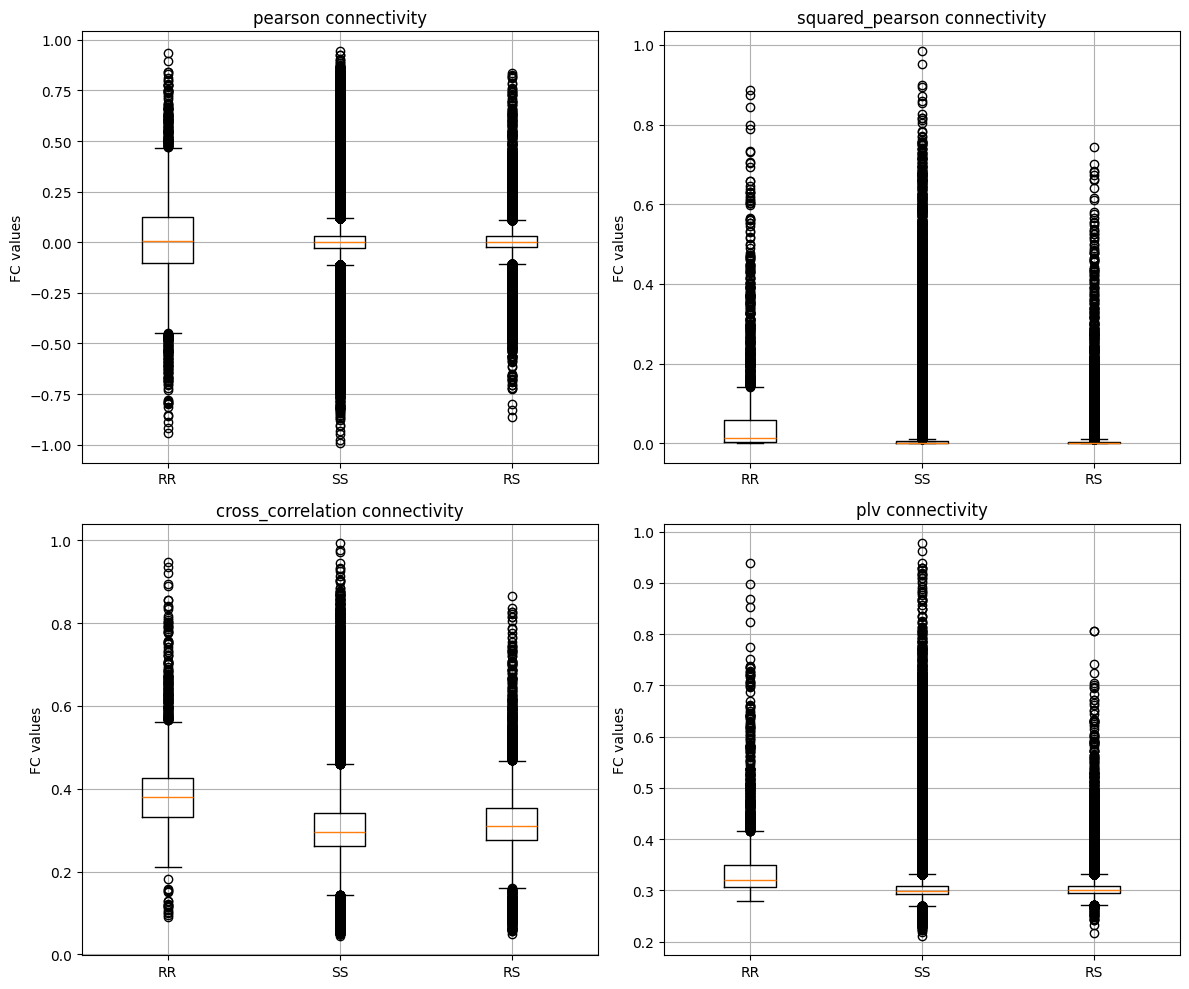

In [11]:
#!/usr/bin/env python3
# Base directory and FC matrix types.
base_dir = Path("/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/Penn")
exclude_subjects = {"sub-RID0051", "sub-RID0595"}
fc_keys = ['pearson', 'squared_pearson', 'cross_correlation', 'plv']

# Container to accumulate FC values by matrix type and connection type.
data_by_group = {key: {'RR': [], 'SS': [], 'RS': []} for key in fc_keys}

# Loop over each non-excluded subject.
subjects = sorted([d for d in base_dir.iterdir() if d.is_dir() and d.name not in exclude_subjects])
for subject in subjects:
    # Locate the subject's H5 file.
    h5_files = list(subject.rglob("interictal_ieeg_processed.h5"))
    if not h5_files:
        print(f"No H5 file for subject {subject.name}")
        continue
    h5_file = h5_files[0]
    
    # Open the H5 file and try to retrieve the "spared" attribute.
    with h5py.File(h5_file, "r") as f:
        ieeg_dataset = f['/bipolar_montage/ieeg']
        if 'spared' in ieeg_dataset.attrs:
            spared = np.array(ieeg_dataset.attrs['spared'], dtype=bool)
        elif '/bipolar_montage/coordinates' in f:
            coords = f['/bipolar_montage/coordinates']
            if 'spared' in coords.attrs:
                spared = np.array(coords.attrs['spared'], dtype=bool)
            else:
                print(f"Attribute 'spared' not found for subject {subject.name} in both ieeg and coordinates. Skipping subject.")
                continue
        else:
            print(f"Attribute 'spared' not found for subject {subject.name}. Skipping subject.")
            continue

    # Process each FC matrix file for the subject.
    for key in fc_keys:
        fc_file = subject / f"{subject.name}_fc_{key}.pkl"
        if not fc_file.exists():
            print(f"Missing {key} FC file for subject {subject.name}")
            continue
        with open(fc_file, "rb") as f:
            fc_mat = pickle.load(f)
        
        n = fc_mat.shape[0]
        # Verify the number of electrodes matches the length of the spared mask.
        if n != spared.size:
            print(f"Mismatch in electrode count for subject {subject.name} and FC {key}. Skipping this FC file.")
            continue

        # Extract the upper-triangular indices (excluding diagonal).
        triu_idx = np.triu_indices(n, k=1)
        fc_values = fc_mat[triu_idx]
        # Get spared/resected status for each electrode involved.
        status_i = spared[triu_idx[0]]
        status_j = spared[triu_idx[1]]
        # Define groups:
        # RR: both electrodes resected (spared==False)
        RR_mask = (~status_i) & (~status_j)
        # SS: both electrodes spared (spared==True)
        SS_mask = status_i & status_j
        # RS: one electrode spared and the other resected.
        RS_mask = ((~status_i) & status_j) | (status_i & (~status_j))
        
        # Accumulate the connectivity values for each group.
        data_by_group[key]['RR'].extend(fc_values[RR_mask].tolist())
        data_by_group[key]['SS'].extend(fc_values[SS_mask].tolist())
        data_by_group[key]['RS'].extend(fc_values[RS_mask].tolist())

# Compute and print basic statistics and percentage of outliers for each FC matrix and connection type.
print("\nBasic statistics across all subjects:")
for key in fc_keys:
    print(f"\nFC Matrix: {key}")
    for group in ['RR', 'SS', 'RS']:
        values = np.array(data_by_group[key][group])
        if values.size == 0:
            print(f"  {group}: No data")
            continue
        count = values.size
        mean = np.mean(values)
        std = np.std(values)
        median = np.median(values)
        min_val = np.min(values)
        max_val = np.max(values)
        # Compute Q1, Q3 and IQR.
        Q1 = np.percentile(values, 25)
        Q3 = np.percentile(values, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Count outliers.
        outliers = np.sum((values < lower_bound) | (values > upper_bound))
        outlier_percent = (outliers / count) * 100
        
        stats = {
            "count": int(count),
            "mean": float(mean),
            "std": float(std),
            "median": float(median),
            "min": float(min_val),
            "max": float(max_val),
            "outlier_percentage": float(outlier_percent)
        }
        print(f"  {group}: {stats}")

# Create boxplots for visualizing the distributions.
num_fc = len(fc_keys)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs = axs.flatten()

for idx, key in enumerate(fc_keys):
    data_to_plot = []
    labels = []
    for group in ['RR', 'SS', 'RS']:
        values = np.array(data_by_group[key][group])
        if values.size == 0:
            continue
        data_to_plot.append(values)
        labels.append(group)
    axs[idx].boxplot(data_to_plot, labels=labels)
    axs[idx].set_title(f"{key} connectivity")
    axs[idx].set_ylabel("FC values")
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

In [15]:
# compute GT metrics
#!/usr/bin/env python3
base_dir = Path("/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/Penn")
exclude_subjects = {"sub-RID0051", "sub-RID0595"}
fc_keys = ['pearson', 'squared_pearson', 'cross_correlation', 'plv']

def compute_participation(G, communities, node_strength):
    n = len(node_strength)
    part = np.zeros(n)
    for i in range(n):
        k_i = node_strength[i]
        if k_i == 0:
            part[i] = 0
        else:
            s = 0
            for comm in communities:
                k_ic = sum(G[i][j]['weight'] for j in comm if j in G[i])
                s += (k_ic / k_i) ** 2
            part[i] = 1 - s
    return part

subjects = sorted([d for d in base_dir.iterdir() if d.is_dir() and d.name not in exclude_subjects])
for subject in subjects:
    for key in fc_keys:
        fc_file = subject / f"{subject.name}_fc_{key}.pkl"
        if not fc_file.exists():
            continue
        with open(fc_file, "rb") as f:
            fc_mat = pickle.load(f)
        n = fc_mat.shape[0]
        ns = np.sum(fc_mat, axis=1)
        G = nx.from_numpy_array(fc_mat)
        try:
            eigen_dict = nx.eigenvector_centrality_numpy(G, weight='weight')
            eigen = np.array([eigen_dict[i] for i in range(n)])
        except Exception:
            eigen = np.full(n, np.nan)
        clustering_dict = nx.clustering(G, weight='weight')
        clustering = np.array([clustering_dict[i] for i in range(n)])
        communities = list(nx.algorithms.community.greedy_modularity_communities(G, weight='weight'))
        participation = compute_participation(G, communities, ns)
        metrics = {
            'node_strength': ns,
            'eigenvector': eigen,
            'clustering': clustering,
            'participation': participation
        }
        out_file = subject / f"{subject.name}_fc_{key}_graph.pkl"
        with open(out_file, "wb") as f:
            pickle.dump(metrics, f)
        print(f"Saved graph metrics for {subject.name} - {key}")

Saved graph metrics for sub-RID0031 - pearson
Saved graph metrics for sub-RID0031 - squared_pearson
Saved graph metrics for sub-RID0031 - cross_correlation
Saved graph metrics for sub-RID0031 - plv
Saved graph metrics for sub-RID0032 - pearson
Saved graph metrics for sub-RID0032 - squared_pearson
Saved graph metrics for sub-RID0032 - cross_correlation
Saved graph metrics for sub-RID0032 - plv
Saved graph metrics for sub-RID0033 - pearson
Saved graph metrics for sub-RID0033 - squared_pearson
Saved graph metrics for sub-RID0033 - cross_correlation
Saved graph metrics for sub-RID0033 - plv
Saved graph metrics for sub-RID0050 - pearson
Saved graph metrics for sub-RID0050 - squared_pearson
Saved graph metrics for sub-RID0050 - cross_correlation
Saved graph metrics for sub-RID0050 - plv
Saved graph metrics for sub-RID0064 - pearson
Saved graph metrics for sub-RID0064 - squared_pearson
Saved graph metrics for sub-RID0064 - cross_correlation
Saved graph metrics for sub-RID0064 - plv
Saved grap

Stats

In [5]:
import pickle
import h5py
import numpy as np
import networkx as nx
from pathlib import Path

base_dir = Path("/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/Penn")
exclude_subjects = {"sub-RID0051", "sub-RID0595"}
fc_key = 'pearson'
subjects = sorted([d for d in base_dir.iterdir() if d.is_dir() and d.name not in exclude_subjects])

# Collect all unique channel labels across subjects
all_labels = set()
subject_channels = {}
for subj in subjects:
    h5_files = list(subj.rglob("interictal_ieeg_processed.h5"))
    if not h5_files:
        continue
    with h5py.File(h5_files[0], 'r') as f:
        ds = f['/bipolar_montage/ieeg']
        labels = ds.attrs['channels_labels']
        subject_channels[subj.name] = list(labels)
        all_labels.update(labels)
all_labels = sorted(all_labels)

# For each subject, load the FC matrix, compute metrics, and store them in a label-aligned array
subject_metrics = {}
for subj in subjects:
    fc_file = subj / f"{subj.name}_fc_{fc_key}.pkl"
    if not fc_file.exists():
        continue
    with open(fc_file, 'rb') as f:
        fc_mat = pickle.load(f)
    labels = subject_channels.get(subj.name, [])
    if len(labels) != fc_mat.shape[0]:
        continue
    G = nx.from_numpy_array(fc_mat)
    try:
        evec_dict = nx.eigenvector_centrality_numpy(G, weight='weight')
        evec = np.array([evec_dict[i] for i in range(len(labels))])
    except:
        evec = np.full(len(labels), np.nan)
    ns = fc_mat.sum(axis=1)
    clust_dict = nx.clustering(G, weight='weight')
    clust = np.array([clust_dict[i] for i in range(len(labels))])
    subject_metrics[subj.name] = {
        'labels': labels,
        'node_strength': ns,
        'eigenvector': evec,
        'clustering': clust
    }

# Build a unified matrix for each metric, aligned by label
metric_names = ['node_strength', 'eigenvector', 'clustering']
aligned_data = {m: {} for m in metric_names}
for subj, data in subject_metrics.items():
    arrs = {}
    for m in metric_names:
        arr = np.full(len(all_labels), np.nan)
        label_map = {lab: i for i, lab in enumerate(data['labels'])}
        for i, lab in enumerate(all_labels):
            if lab in label_map:
                arr[i] = data[m][label_map[lab]]
        arrs[m] = arr
    for m in metric_names:
        aligned_data[m][subj] = arrs[m]

# compute the mean of each metric for each label across all subjects
for m in metric_names:
    stacked = np.column_stack([aligned_data[m][s] for s in aligned_data[m]])
    mean_across_subj = np.nanmean(stacked, axis=1)
    print(f"{m} - shape of stacked: {stacked.shape}")
    print(f"Mean across subjects (aligned by label): {mean_across_subj}")

node_strength - shape of stacked: (959, 40)
Mean across subjects (aligned by label): [ 1.79940175e+00 -3.99808472e-01 -1.23614380e+00  2.78164244e+00
  2.49394153e+00  2.54379911e+00  2.78753009e+00  2.68323955e-01
  8.38687411e-01  1.86611466e-01  7.37124083e-01  7.30650615e-01
  7.69547945e-01 -1.51770639e+00  9.29581576e-01  1.54259744e+00
  1.23005499e+00  3.96852768e-01  9.51340045e-01 -2.04865613e-01
  1.32865305e-01 -6.48125407e-02  9.65493067e-01  9.73455859e-01
  1.71951306e+00  1.09512665e+00  7.16039578e-01  2.27851884e-01
  1.47735653e-01  2.11106552e-02  1.67010485e+00  1.75551790e+00
  1.73378951e+00  8.51873079e-01  1.05300933e+00  1.21475597e+00
  1.67490398e+00  1.48854307e+00  1.20845382e+00  2.05281619e+00
  2.07423633e+00  2.14196063e+00  7.37507673e-01  1.81549808e-01
  7.36585491e-01  8.31044883e-01  1.74899110e-01  5.73626749e-01
  5.79027058e-01  9.41780596e-01  3.05479691e-02 -2.37257399e-01
  1.73127065e-01  4.51211651e-02  3.03222619e-01  5.67823716e-01
 -4.0


Results for FC type: pearson
  node_strength: t = 0.304, p = 0.763


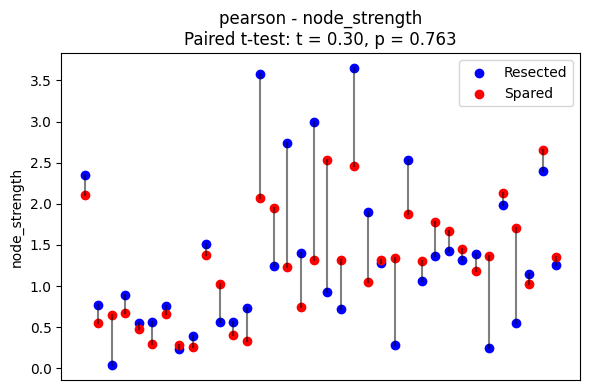

  eigenvector: t = -0.846, p = 0.403


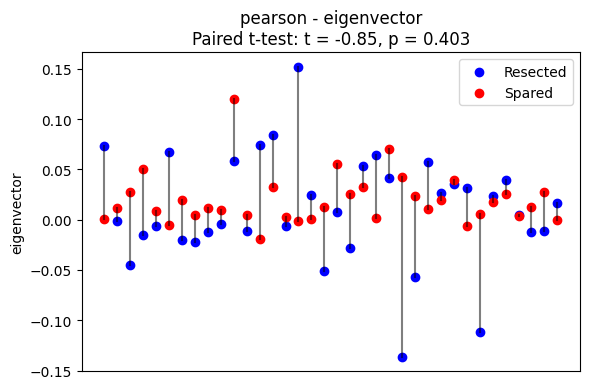

  clustering: t = 1.086, p = 0.285


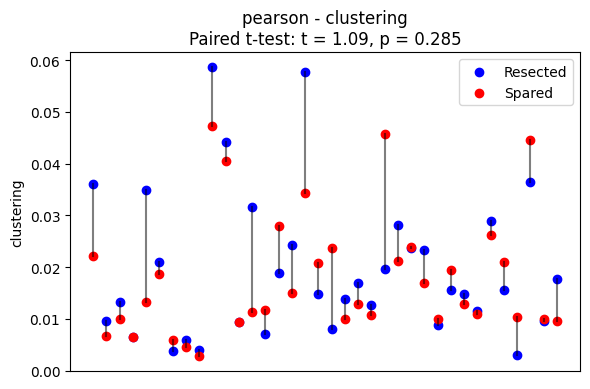

  participation: t = 1.855, p = 0.072


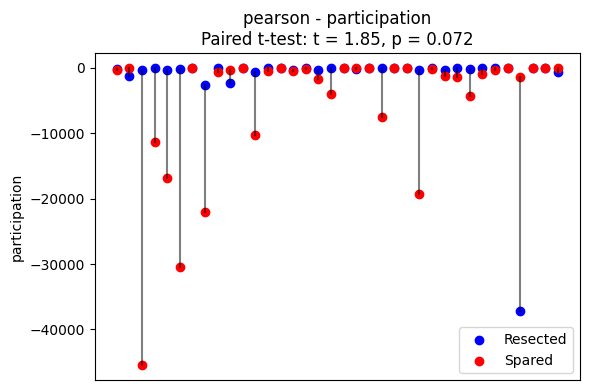


Results for FC type: squared_pearson
  node_strength: t = 1.787, p = 0.083


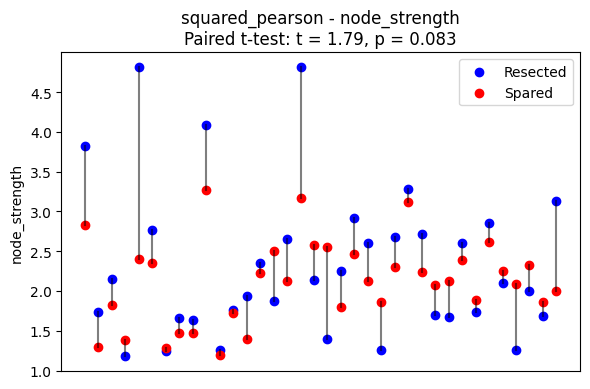

  eigenvector: t = 1.755, p = 0.088


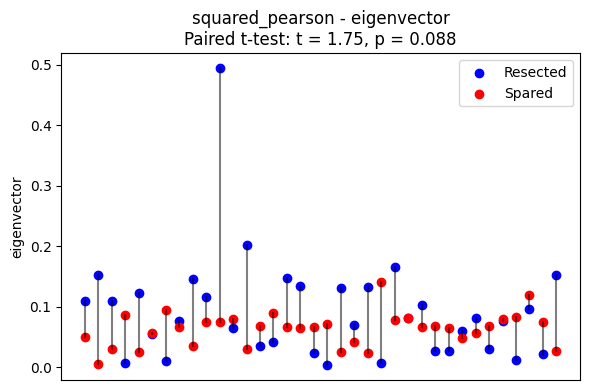

  clustering: t = 1.156, p = 0.255


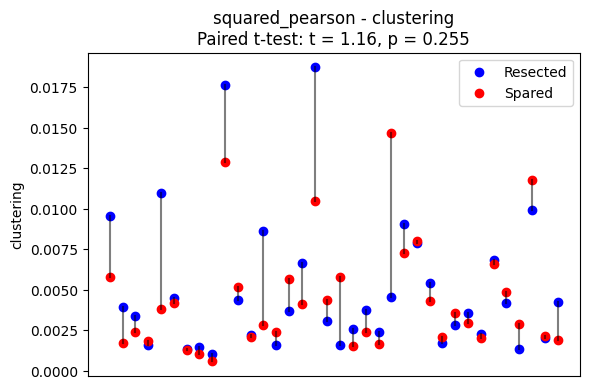

  participation: t = 1.400, p = 0.170


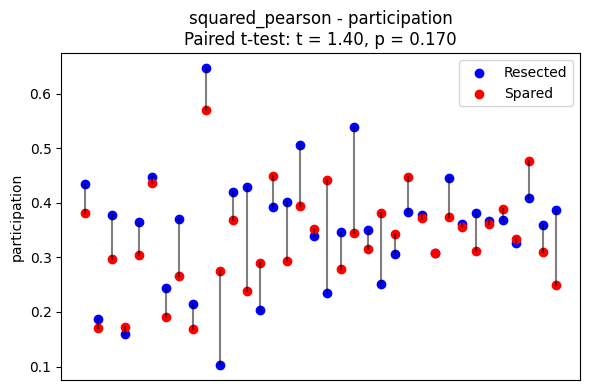


Results for FC type: cross_correlation
  node_strength: t = 3.119, p = 0.004


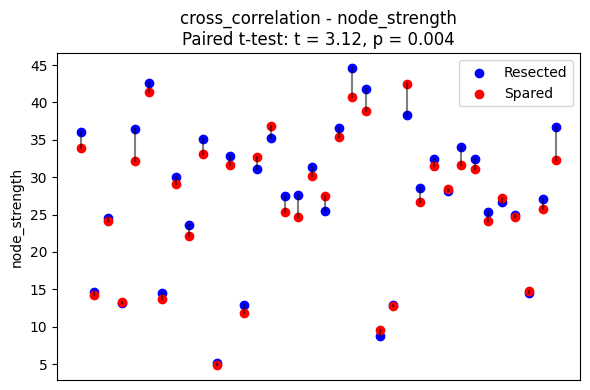

  eigenvector: t = 3.062, p = 0.004


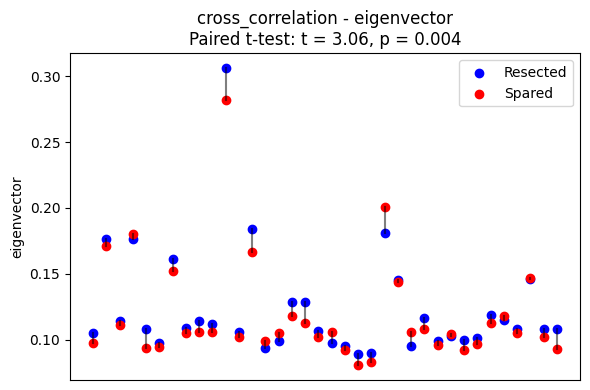

  clustering: t = 3.024, p = 0.005


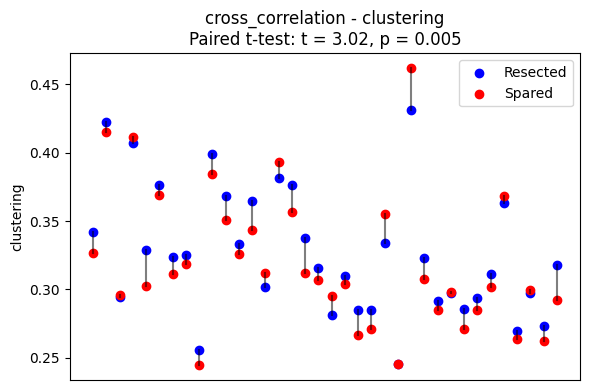

  participation: t = -2.538, p = 0.016


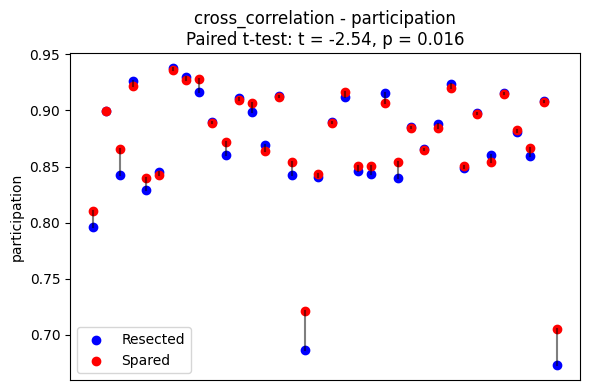


Results for FC type: plv
  node_strength: t = 1.642, p = 0.110


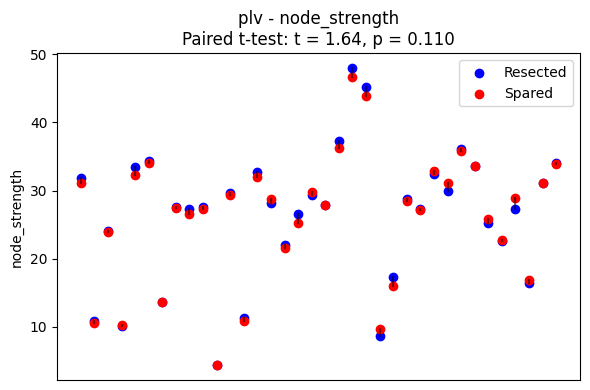

  eigenvector: t = 0.508, p = 0.615


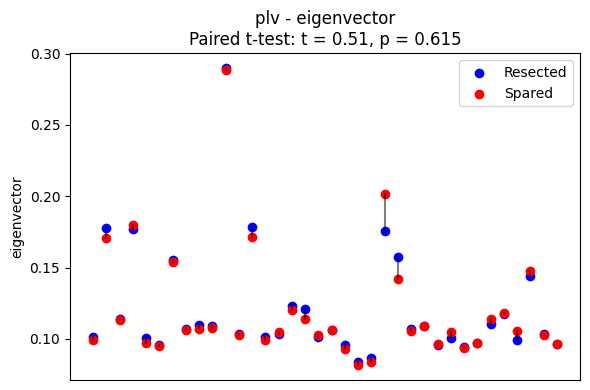

  clustering: t = 0.834, p = 0.410


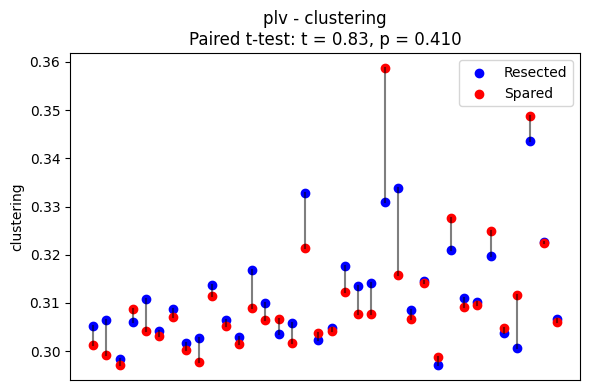

  participation: t = -1.530, p = 0.135


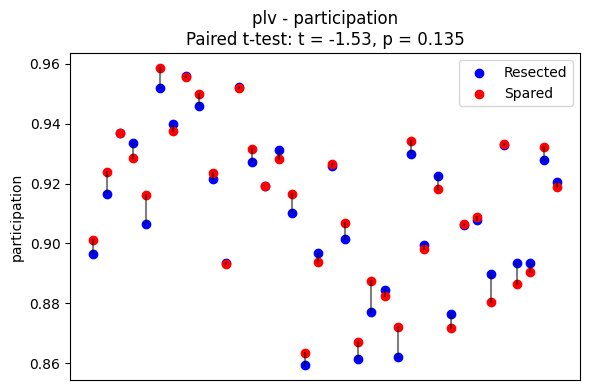

In [6]:
import pickle
import numpy as np
import h5py
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

base_dir = Path("/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/Penn")
exclude_subjects = {"sub-RID0051", "sub-RID0595"}
fc_keys = ['pearson', 'squared_pearson', 'cross_correlation', 'plv']
metrics_names = ['node_strength', 'eigenvector', 'clustering', 'participation']

results_stats = {fc: {m: {'R': [], 'S': []} for m in metrics_names} for fc in fc_keys}
subjects = sorted([d for d in base_dir.iterdir() if d.is_dir() and d.name not in exclude_subjects])

for subj in subjects:
    h5_files = list(subj.rglob("interictal_ieeg_processed.h5"))
    if not h5_files:
        continue
    with h5py.File(h5_files[0], "r") as f:
        ds = f['/bipolar_montage/ieeg']
        labels = list(ds.attrs['channels_labels'])
        if 'spared' in ds.attrs:
            spared = np.array(ds.attrs['spared'], dtype=bool)
        elif '/bipolar_montage/coordinates' in f and 'spared' in f['/bipolar_montage/coordinates'].attrs:
            spared = np.array(f['/bipolar_montage/coordinates'].attrs['spared'], dtype=bool)
        else:
            continue
    for fc in fc_keys:
        metrics_file = subj / f"{subj.name}_fc_{fc}_graph.pkl"
        if not metrics_file.exists():
            continue
        with open(metrics_file, "rb") as f:
            metrics_data = pickle.load(f)
        if len(labels) != metrics_data['node_strength'].shape[0]:
            continue
        for m in metrics_names:
            vals = metrics_data[m]
            R_vals = vals[~spared]
            S_vals = vals[spared]
            avg_R = np.mean(R_vals) if R_vals.size > 0 else np.nan
            avg_S = np.mean(S_vals) if S_vals.size > 0 else np.nan
            results_stats[fc][m]['R'].append(avg_R)
            results_stats[fc][m]['S'].append(avg_S)

for fc in fc_keys:
    print(f"\nResults for FC type: {fc}")
    for m in metrics_names:
        R_arr = np.array(results_stats[fc][m]['R'])
        S_arr = np.array(results_stats[fc][m]['S'])
        valid = ~np.isnan(R_arr) & ~np.isnan(S_arr)
        if np.sum(valid) < 2:
            print(f"  {m}: not enough valid subjects")
            continue
        t_stat, p_val = ttest_rel(R_arr[valid], S_arr[valid])
        print(f"  {m}: t = {t_stat:.3f}, p = {p_val:.3f}")
        plt.figure(figsize=(6,4))
        plt.scatter(np.arange(np.sum(valid)), R_arr[valid], color='blue', label='Resected')
        plt.scatter(np.arange(np.sum(valid)), S_arr[valid], color='red', label='Spared')
        for i in range(np.sum(valid)):
            plt.plot([i, i], [R_arr[valid][i], S_arr[valid][i]], 'k-', alpha=0.5)
        plt.title(f"{fc} - {m}\nPaired t-test: t = {t_stat:.2f}, p = {p_val:.3f}")
        plt.xticks([])
        plt.ylabel(m)
        plt.legend()
        plt.tight_layout()
        plt.show()
